* Criado por: Gabriel Quintella
* Data Criação: 24.01.2023
* Data Última Modificação: 26.01.2023
* Repositório: https://github.com/dbaassists/Projeto-KB-Spark/blob/main/Projeto%20KB%20Spark.ipynb

DESCRIÇÃO DO PROJETO

Criar uma base de conhecimento (KB) com comandos pyspark.

*  Dia 1 - 24.01.2023 - Lançamento do Projeto;
*  Dia 2 - 26.01.2023 - Aprimoramento do Projeto com melhoria nos exemplos criados;



 Sumário

* 01 - Instalação da Biblioteca PySpark
* 02 - Definição de Bibliotecas
* 03 - Configurando o Spark no Windows
* 04 - Importando Arquivo CSV
* 05 - Transformando o DataFrame Spark em Tabela Temporária
* 06 - Consultando a Estrutura do DataFrame Spark
* 07 - Lendo a Tabela e Transformando em outro DataFrame Spark
* 08 - Convertendo o DataType de uma Coluna de um DataFrame Spark
* 09 - Convertendo o DataType e Criando uma nova Coluna de um DataFrame Spark
* 10 - Renomeando uma Coluna em DataFrame Spark
* 11 - Renomeando Várias Colunas em DataFrame Spark
* 12 - Ordenando um DataFrame Spark


# 01 - Instalação da Biblioteca PySpark

In [1]:
#pip install pyspark

# 02 - Definição de Bibliotecas

In [2]:
import sys
import requests
import pandas as pd
import json
import pyspark.sql.functions as F #import explode_outer, col
from pyspark.sql.types import *
import os
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark import SparkConf
from pyspark import SparkContext
import urllib
from sqlalchemy import __version__ as sa_version, create_engine, text


# 03 - Configurando o Spark no Windows

** Link de Referência: https://phoenixnap.com/kb/install-spark-on-windows-10

* 1 - Instalando o Java 

** Link de Download: https://www.oracle.com/br/java/technologies/javase/javase8u211-later-archive-downloads.html

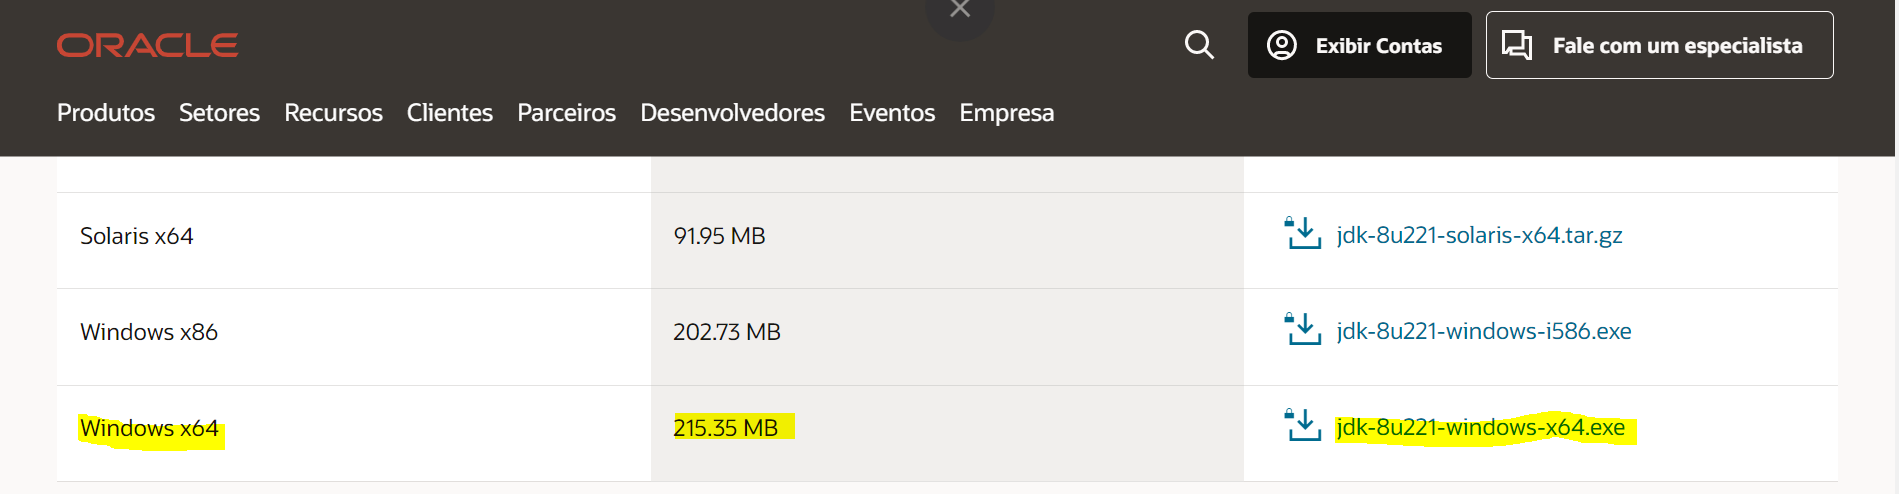

** Após o download do instalador basta seguir Next Next Finish;

** Concluida a instalação, abra o prompt de comando (CMD) e execute o comando abaixo.

* Comando: java -version

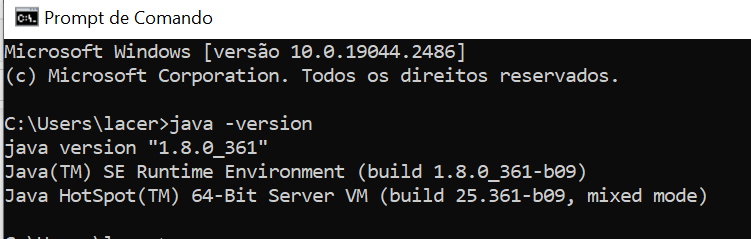

* 2 - Instalando o Python

** Link de Download: https://www.python.org/downloads/

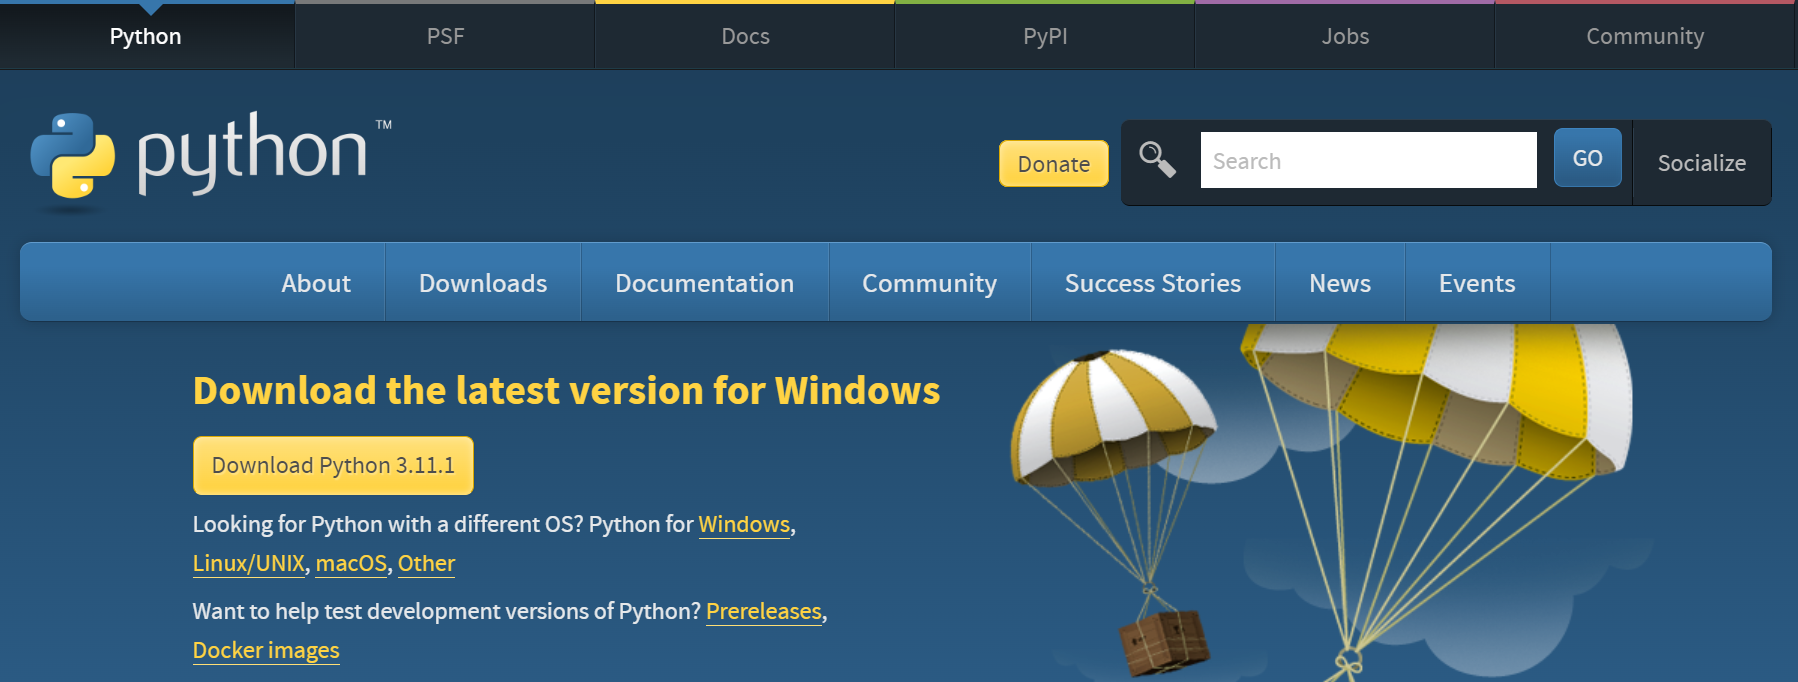

** Após o download do instalador basta seguir Next Next Finish;

** Concluida a instalação, abra o prompt de comando (CMD) e execute o comando abaixo.

* Comando: python --version

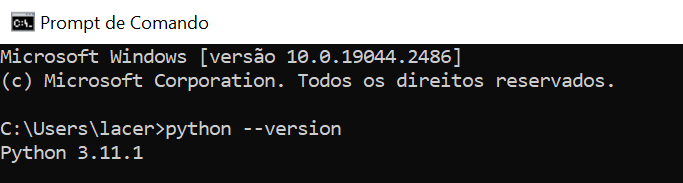

* 3 - Download Apache Spark

** Link de Download: https://spark.apache.org/downloads.html

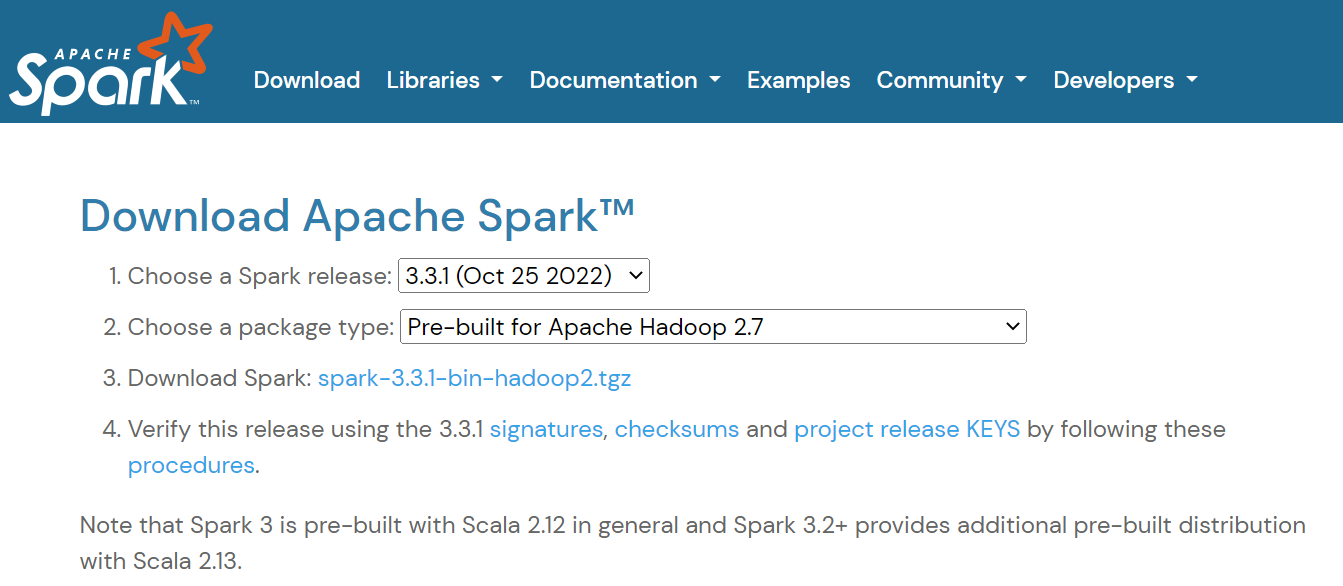

* 4 - Instalando Apache Spark

** Criar na unidade C: um diretório com o nome "Spark";

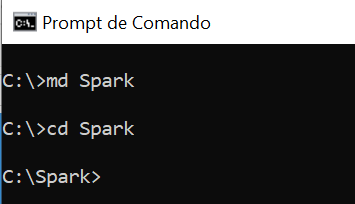

** Buscar o arquivo que teve seu download realizado no passo 3 e descompactar no diretório "C:\Spark" (Imagem abaixo);

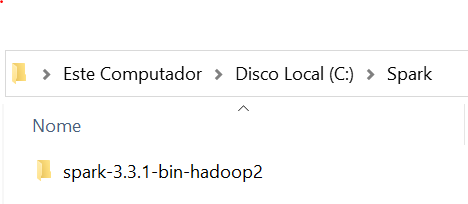

* 5 - Download Arquivo "winutils.exe"

** Acessar o GitHub https://github.com/kontext-tech/winutils 

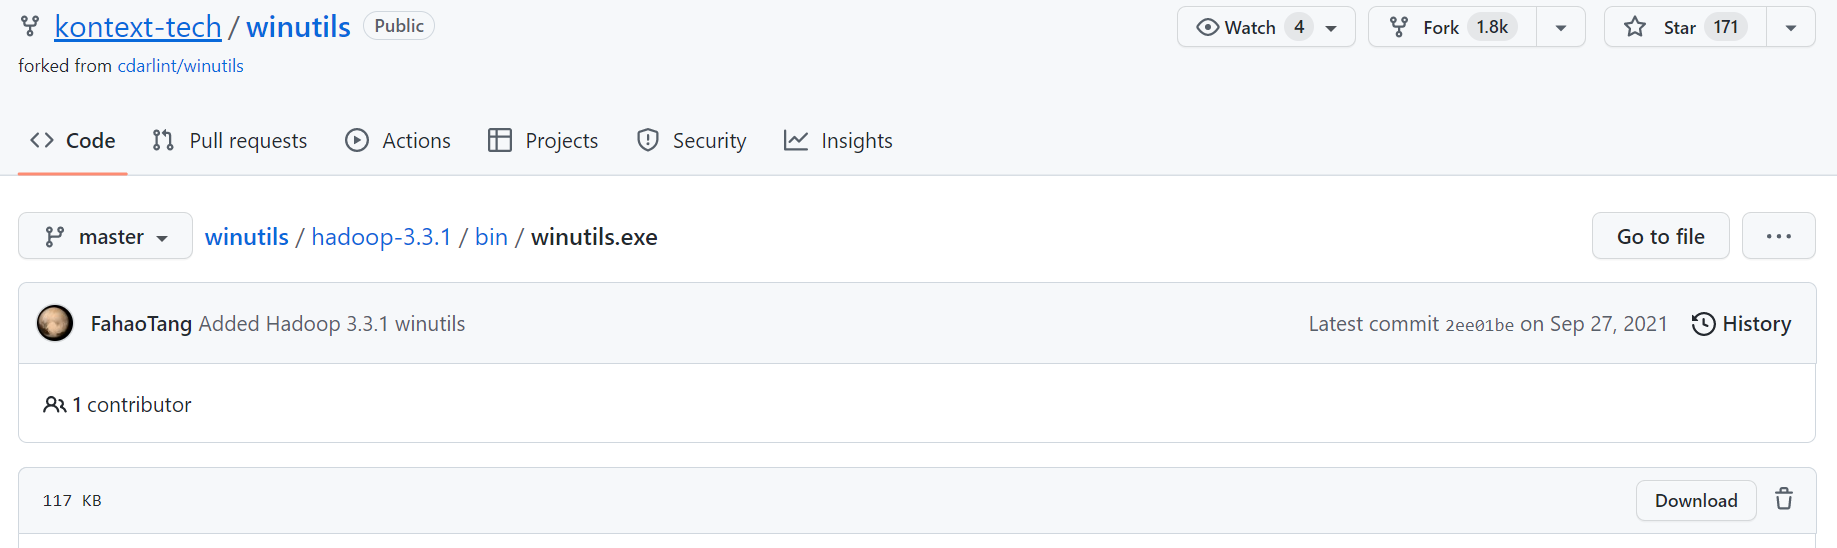

** Em nosso exemplo, estamos usando a Spark release 3.3.1. Basta clicar no botão "download";

** Criar na unidade C: um diretório com o nome "Hadoop" e em "Hadoop" criar o subdiretório "bin";

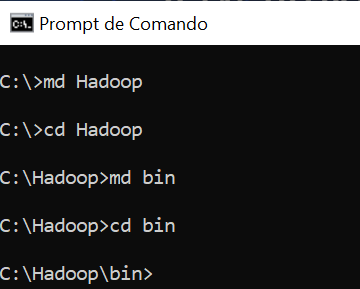

** Copiar o arquivo do diretório de download para o diretório "C:\Hadoop\bin";

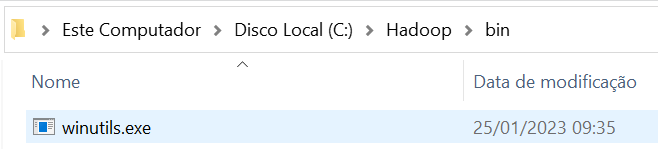

* 6 - Configurando Variáveis de Ambiente

** Criar a variável SPARK_HOME

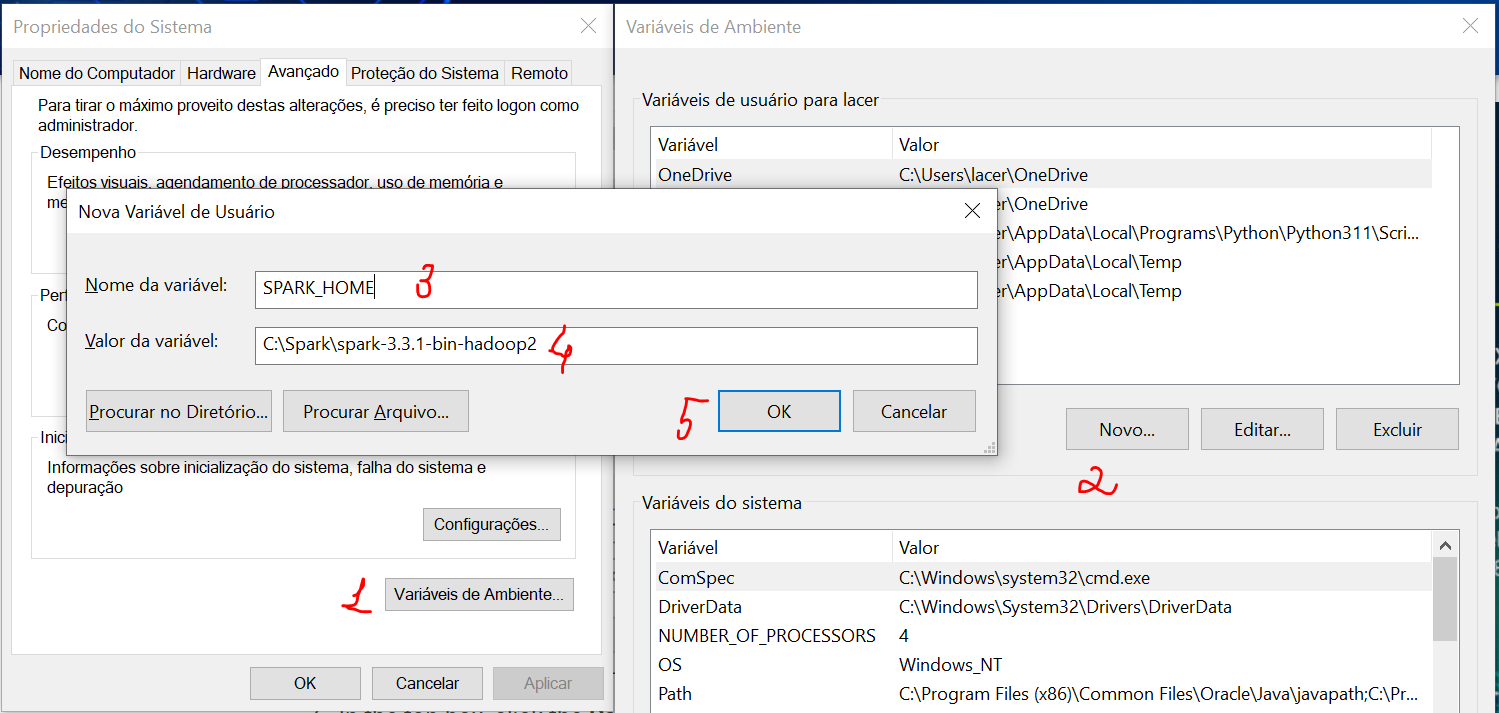

** Clicar em Path, depois em Edit, depois em Novo e adicionar %SPARK_HOME%\bin

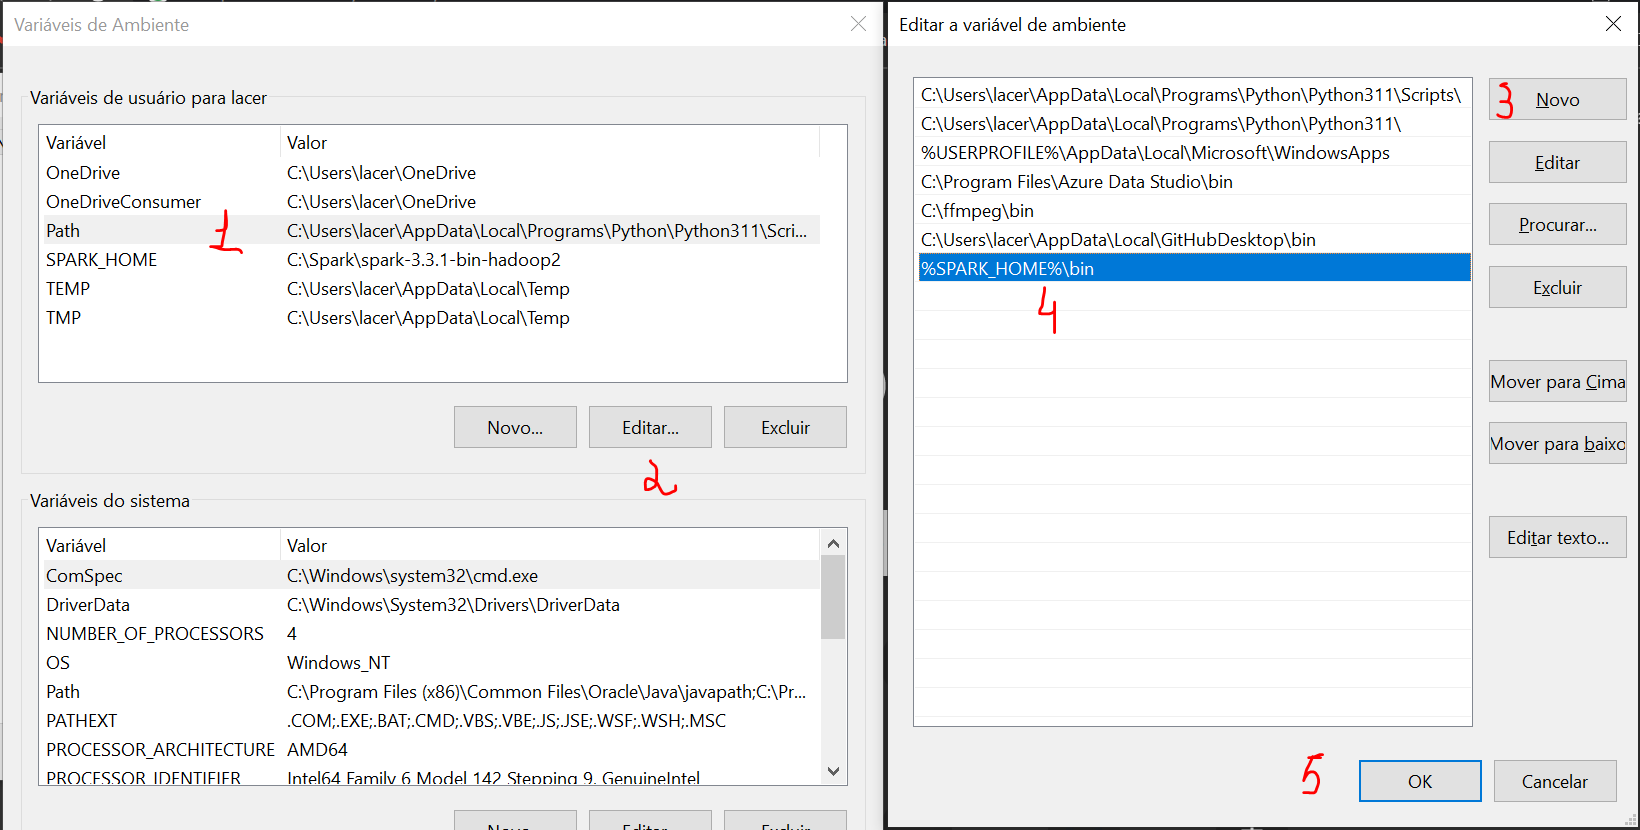

** Criar a variável HADOOP_HOME

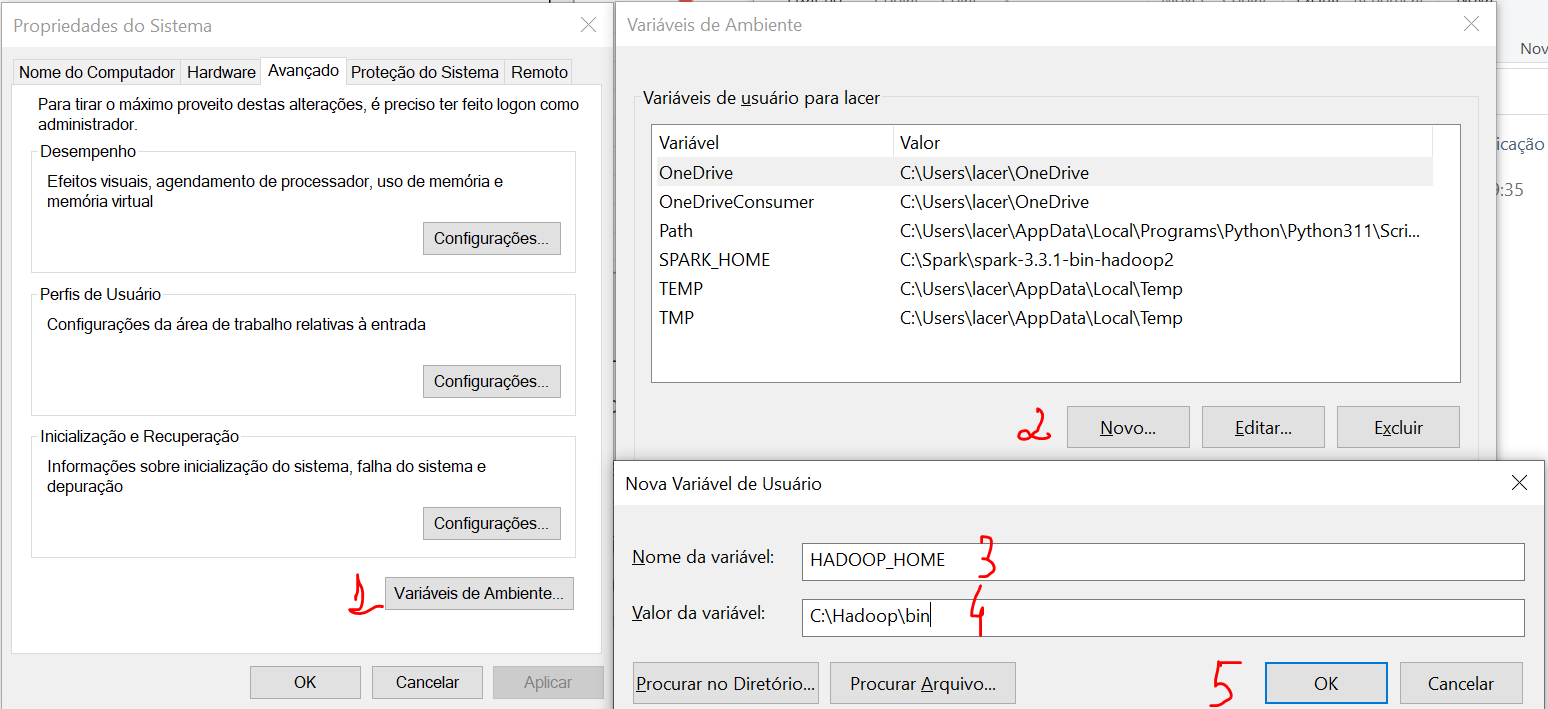

** Clicar em Path, depois em Edit, depois em Novo e adicionar %SPARK_HOME%\bin

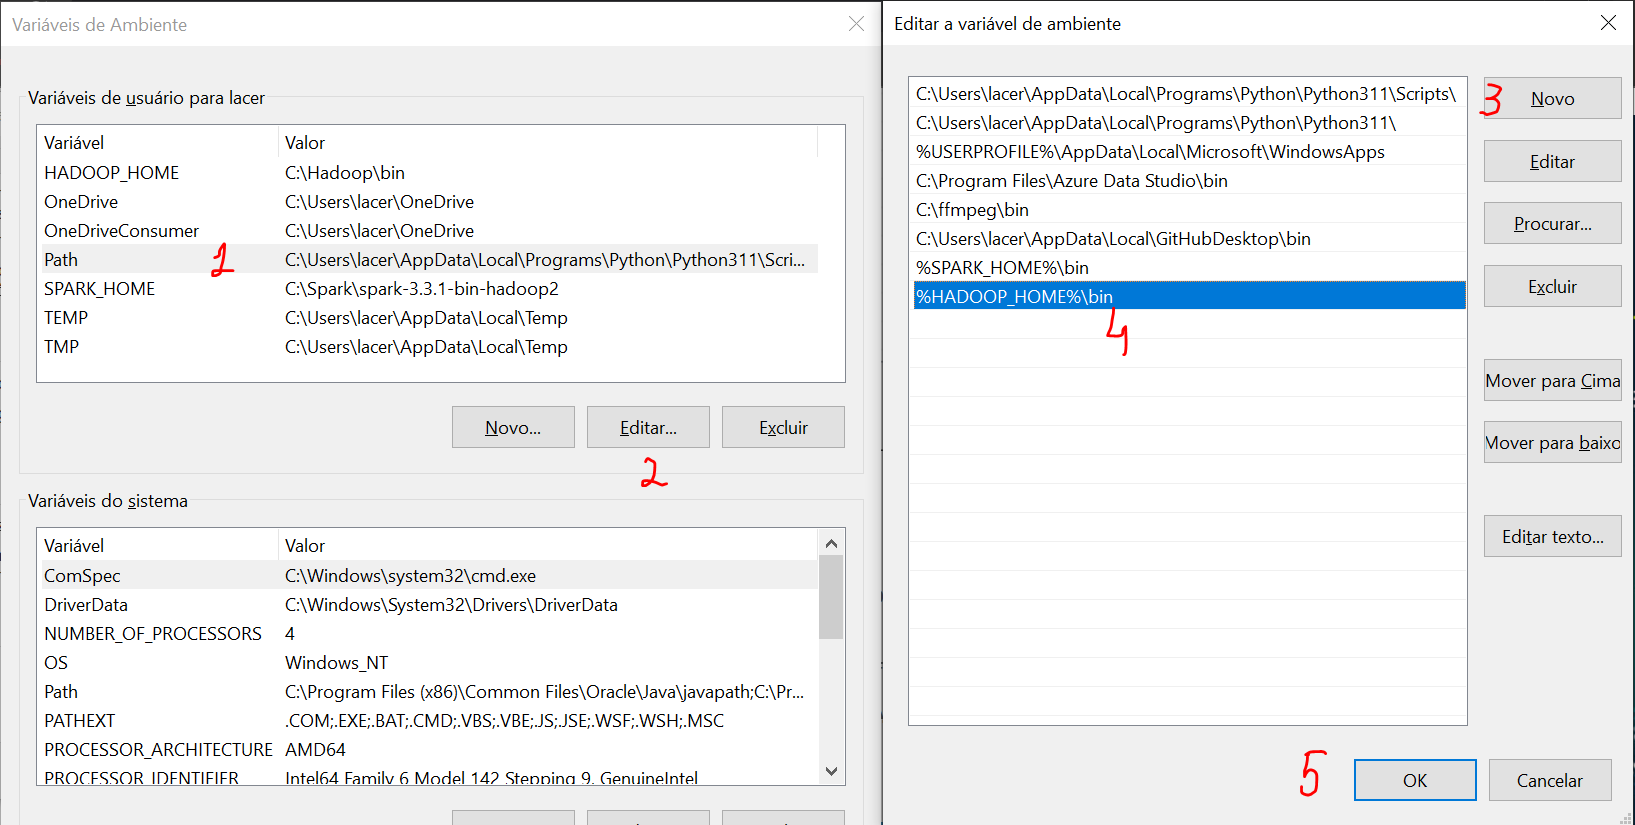

** Criar a variável JAVA_HOME

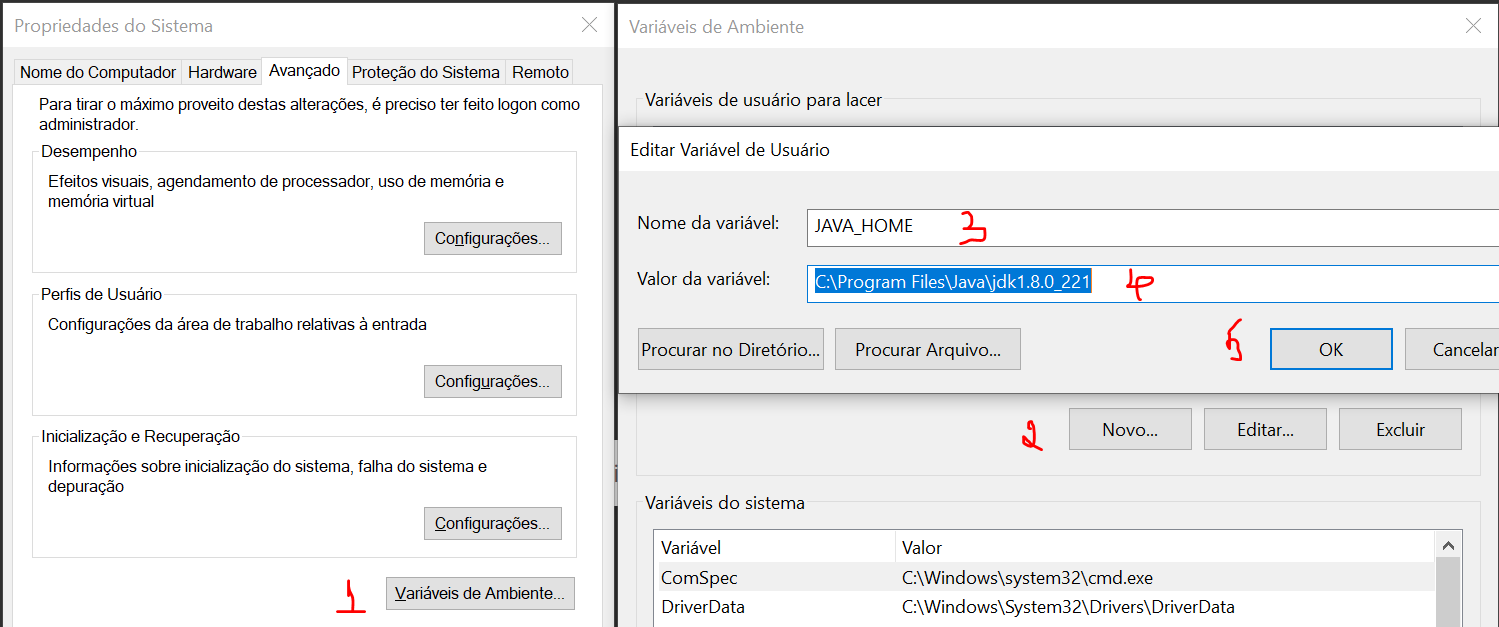

* 7 - Iniciando o Spark

** Abra o prompt de comando (CMD) como Administrador e execute o comando abaixo.

** Digite no prompt de comando "cd C:\Spark\spark-3.3.1-bin-hadoop2\bin"

** Digite "spark-shell"

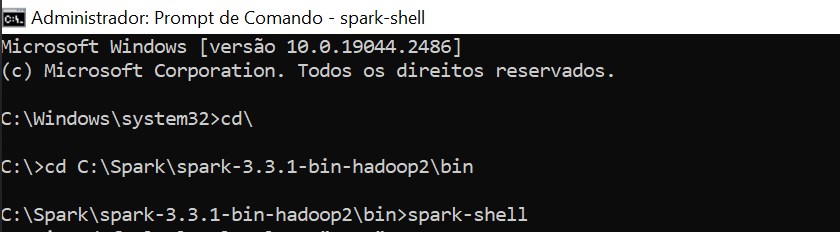

# 04 - Importando Arquivo CSV

In [20]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

arquivo = '../ProjetoSparkKB/Dados/Candidato/consulta_cand_2022_BRASIL.csv'

df = spark.read.csv(arquivo, sep=';',header=True)

df.select('DT_GERACAO').show()

df.show(truncate=False)

+----------+
|DT_GERACAO|
+----------+
|21/01/2023|
|21/01/2023|
|21/01/2023|
|21/01/2023|
|21/01/2023|
|21/01/2023|
|21/01/2023|
|21/01/2023|
|21/01/2023|
|21/01/2023|
|21/01/2023|
|21/01/2023|
|21/01/2023|
|21/01/2023|
|21/01/2023|
|21/01/2023|
|21/01/2023|
|21/01/2023|
|21/01/2023|
|21/01/2023|
+----------+
only showing top 20 rows

+----------+----------+-----------+---------------+-----------------+--------+----------+------------------------------+----------+--------------+-----+-----+-----------------+--------+-----------------+------------+------------+-------------------------------------------+-----------------------------+-------------------+----------------+--------------+-----------------------+-----------------------+------------------------+------------------------+---------------+----------+-------------+----------------------------------------+------------+------------------------+--------------+-----------------------+------------+---------------+---------------------

In [27]:
arquivo = '../ProjetoSparkKB/Dados/Candidato/consulta_cand_2022_BRASIL.csv'

dfExemplo2 = spark.read.format("csv").load(arquivo)
    
dfExemplo2.printSchema()

root
 |-- _c0: string (nullable = true)



In [39]:
arquivo = '../ProjetoSparkKB/Dados/Candidato/consulta_cand_2022_BRASIL.csv'

dfExemplo3 = spark.read.option("inferSchema",False) \
                .option("delimiter",";") \
                .option("header",True) \
                .csv(arquivo)

dfExemplo3.printSchema()

root
 |-- DT_GERACAO: string (nullable = true)
 |-- HH_GERACAO: string (nullable = true)
 |-- ANO_ELEICAO: string (nullable = true)
 |-- CD_TIPO_ELEICAO: string (nullable = true)
 |-- NM_TIPO_ELEICAO: string (nullable = true)
 |-- NR_TURNO: string (nullable = true)
 |-- CD_ELEICAO: string (nullable = true)
 |-- DS_ELEICAO: string (nullable = true)
 |-- DT_ELEICAO: string (nullable = true)
 |-- TP_ABRANGENCIA: string (nullable = true)
 |-- SG_UF: string (nullable = true)
 |-- SG_UE: string (nullable = true)
 |-- NM_UE: string (nullable = true)
 |-- CD_CARGO: string (nullable = true)
 |-- DS_CARGO: string (nullable = true)
 |-- SQ_CANDIDATO: string (nullable = true)
 |-- NR_CANDIDATO: string (nullable = true)
 |-- NM_CANDIDATO: string (nullable = true)
 |-- NM_URNA_CANDIDATO: string (nullable = true)
 |-- NM_SOCIAL_CANDIDATO: string (nullable = true)
 |-- NR_CPF_CANDIDATO: string (nullable = true)
 |-- NM_EMAIL: string (nullable = true)
 |-- CD_SITUACAO_CANDIDATURA: string (nullable = tr

# 05 - Transformando o DataFrame Spark em Tabela Temporária

In [4]:
df.createOrReplaceTempView('teste')

# 06 - Consultando a Estrutura do DataFrame Spark

In [5]:
df.printSchema()

root
 |-- DT_GERACAO: string (nullable = true)
 |-- HH_GERACAO: string (nullable = true)
 |-- ANO_ELEICAO: string (nullable = true)
 |-- CD_TIPO_ELEICAO: string (nullable = true)
 |-- NM_TIPO_ELEICAO: string (nullable = true)
 |-- NR_TURNO: string (nullable = true)
 |-- CD_ELEICAO: string (nullable = true)
 |-- DS_ELEICAO: string (nullable = true)
 |-- DT_ELEICAO: string (nullable = true)
 |-- TP_ABRANGENCIA: string (nullable = true)
 |-- SG_UF: string (nullable = true)
 |-- SG_UE: string (nullable = true)
 |-- NM_UE: string (nullable = true)
 |-- CD_CARGO: string (nullable = true)
 |-- DS_CARGO: string (nullable = true)
 |-- SQ_CANDIDATO: string (nullable = true)
 |-- NR_CANDIDATO: string (nullable = true)
 |-- NM_CANDIDATO: string (nullable = true)
 |-- NM_URNA_CANDIDATO: string (nullable = true)
 |-- NM_SOCIAL_CANDIDATO: string (nullable = true)
 |-- NR_CPF_CANDIDATO: string (nullable = true)
 |-- NM_EMAIL: string (nullable = true)
 |-- CD_SITUACAO_CANDIDATURA: string (nullable = tr

# 07 - Lendo a Tabela e Transformando em outro DataFrame Spark

In [6]:
df2 = spark.sql("""
SELECT DT_GERACAO 
FROM TESTE
""")

# 08 - Convertendo o DataType de uma Coluna de um DataFrame Spark

In [7]:
df2.withColumn("DT_GERACAO", df2["DT_GERACAO"].cast("timestamp")).printSchema()

root
 |-- DT_GERACAO: timestamp (nullable = true)



# 09 - Convertendo o DataType e Criando uma nova Coluna de um DataFrame Spark

In [8]:
df2.withColumn("DTGERACAO", df2["DT_GERACAO"].cast("timestamp")).printSchema()

root
 |-- DT_GERACAO: string (nullable = true)
 |-- DTGERACAO: timestamp (nullable = true)



# 10 - Renomeando uma Coluna em DataFrame Spark

In [9]:
df2.withColumnRenamed("DT_GERACAO","DT_GERACAO2").printSchema()

root
 |-- DT_GERACAO2: string (nullable = true)



# 11 - Renomeando Várias Colunas em DataFrame Spark

In [10]:
df3 = spark.sql("""
SELECT DT_GERACAO , HH_GERACAO
FROM TESTE
""")

In [11]:
df3 = df3.withColumnRenamed("DT_GERACAO","DtGeracao") \
    .withColumnRenamed("HH_GERACAO","HrGeracao")
df3.printSchema()

root
 |-- DtGeracao: string (nullable = true)
 |-- HrGeracao: string (nullable = true)



# 12 - Ordenando um DataFrame Spark

In [13]:
df4 = spark.sql("""
SELECT SG_UF , NM_URNA_CANDIDATO
FROM TESTE
""")

In [15]:
df4.show()

+-----+--------------------+
|SG_UF|   NM_URNA_CANDIDATO|
+-----+--------------------+
|   CE|    TONY IN�CIO SHOW|
|   RJ|ENFERMEIRA SONIA ...|
|   RS|       TANGER JARDIM|
|   SP|  VAVA DO TRANSPORTE|
|   AM|           LEDA MAIA|
|   AL|        �TALO BASTOS|
|   MG|     CARCILEI SOARES|
|   RJ|PAI MARCELO DE OX...|
|   PR|            DR MAGNO|
|   ES|       VANETE CARIRI|
|   PR|       RONNIE CASTRO|
|   PA|      ELIEL FAUSTINO|
|   RJ|        MARCOS UCH�A|
|   ES|IDELFONSO DA VITORIA|
|   AP|PAULO CUNHA COLET...|
|   SE|GILENO PAO FILHO ...|
|   AM|      DR GEORGE LINS|
|   AP|      ALDILENE SOUZA|
|   BA|MISSIONARIA SIMON...|
|   RJ|KARLA DE LUCAS DO...|
+-----+--------------------+
only showing top 20 rows



In [18]:
df4.sort("SG_UF").show(truncate=False)


+-----+---------------------+
|SG_UF|NM_URNA_CANDIDATO    |
+-----+---------------------+
|AC   |PENINHA MAGALHAES    |
|AC   |ANGELINO DO PANDEIRO |
|AC   |TEREZINHA ARAUJO     |
|AC   |HENRY NOGUEIRA       |
|AC   |JOYCE DOS BURACOS    |
|AC   |ADAL�CIO J�NIOR      |
|AC   |TAMPINHA BITTAR      |
|AC   |GIS ARAUJO           |
|AC   |BEBE BOLSONARO       |
|AC   |PROFESSOR CLEMILTON  |
|AC   |LEONCIO CASTRO       |
|AC   |LUANA ARA�JO         |
|AC   |JAQUELINE MEDEIROS   |
|AC   |SGT CARLOS TANACA    |
|AC   |PEDRO LONGO          |
|AC   |CARLINHOS UYENO      |
|AC   |ROGGER WINS          |
|AC   |MARCUS CAVALCANTE    |
|AC   |PROFESSOR ROG�RIO    |
|AC   |PASTORA CLEI�A FRAN�A|
+-----+---------------------+
only showing top 20 rows



# 12.1 - Ordenando um DataFrame Spark por Várias Colunas

In [17]:
df4.sort("SG_UF","NM_URNA_CANDIDATO").show(truncate=False)


+-----+---------------------+
|SG_UF|NM_URNA_CANDIDATO    |
+-----+---------------------+
|AC   |ADAILTON CRUZ        |
|AC   |ADALBERTO ALMEIDA    |
|AC   |ADAL�CIO J�NIOR      |
|AC   |ADEKSON LIMA         |
|AC   |ADENILSON DUAM       |
|AC   |ADERL�NDIO FRAN�A    |
|AC   |ADEVILSON QUEIROZ    |
|AC   |ADONAY               |
|AC   |ADRIANA ANDRADE      |
|AC   |ADRIANA MAIA         |
|AC   |ADRIANA MELO         |
|AC   |AFONSO CONTADOR      |
|AC   |AFONSO FERNANDES     |
|AC   |ALAN RICK            |
|AC   |ALDA RADINE          |
|AC   |ALDENORA SALES       |
|AC   |ALEXANDRE FERNANDES  |
|AC   |ALEXANDRINA VASQUES  |
|AC   |ALMINERES DO ELDORADO|
|AC   |AMANDA SOUZA         |
+-----+---------------------+
only showing top 20 rows



In [19]:

df4.sort(col("SG_UF"),col("NM_URNA_CANDIDATO")).show(truncate=False)

+-----+---------------------+
|SG_UF|NM_URNA_CANDIDATO    |
+-----+---------------------+
|AC   |ADAILTON CRUZ        |
|AC   |ADALBERTO ALMEIDA    |
|AC   |ADAL�CIO J�NIOR      |
|AC   |ADEKSON LIMA         |
|AC   |ADENILSON DUAM       |
|AC   |ADERL�NDIO FRAN�A    |
|AC   |ADEVILSON QUEIROZ    |
|AC   |ADONAY               |
|AC   |ADRIANA ANDRADE      |
|AC   |ADRIANA MAIA         |
|AC   |ADRIANA MELO         |
|AC   |AFONSO CONTADOR      |
|AC   |AFONSO FERNANDES     |
|AC   |ALAN RICK            |
|AC   |ALDA RADINE          |
|AC   |ALDENORA SALES       |
|AC   |ALEXANDRE FERNANDES  |
|AC   |ALEXANDRINA VASQUES  |
|AC   |ALMINERES DO ELDORADO|
|AC   |AMANDA SOUZA         |
+-----+---------------------+
only showing top 20 rows



# 13 - Agrupando um DataFrame Spark

In [21]:
df4.groupBy("SG_UF").count().show(truncate=False).

+-----+-----+
|SG_UF|count|
+-----+-----+
|SC   |996  |
|RO   |633  |
|PI   |433  |
|AM   |664  |
|RR   |612  |
|GO   |1243 |
|TO   |531  |
|MT   |525  |
|BR   |30   |
|SP   |3659 |
|ES   |782  |
|PB   |756  |
|RS   |1437 |
|MS   |598  |
|AL   |503  |
|MG   |2562 |
|PA   |1043 |
|BA   |1723 |
|SE   |545  |
|PE   |1142 |
+-----+-----+
only showing top 20 rows



In [22]:
df5 = spark.sql("""
SELECT SG_UF , NM_URNA_CANDIDATO, SQ_CANDIDATO
FROM TESTE
""")

# 14 - Funções de Agrupamento (Count(), Sum(), Min(), Max() e Mean())

In [25]:
df5.groupBy("SG_UF") \
    .agg(count("SQ_CANDIDATO").alias("count_SQ_CANDIDATO"), \
         sum("SQ_CANDIDATO").alias("sum_SQ_CANDIDATO"), \
         avg("SQ_CANDIDATO").alias("avg_SQ_CANDIDATO"), \
         min("SQ_CANDIDATO").alias("min_SQ_CANDIDATO"), \
         max("SQ_CANDIDATO").alias("max_SQ_CANDIDATO") \
     ) \
    .show(truncate=False)

+-----+------------------+-------------------+---------------------+----------------+----------------+
|SG_UF|count_SQ_CANDIDATO|sum_SQ_CANDIDATO   |avg_SQ_CANDIDATO     |min_SQ_CANDIDATO|max_SQ_CANDIDATO|
+-----+------------------+-------------------+---------------------+----------------+----------------+
|AC   |542               |5.420889490165E12  |1.0001641125765682E10|10001595335     |10001739225     |
|AL   |503               |1.0060834407453E13 |2.0001658861735588E10|20001605776     |20001739199     |
|AM   |664               |2.6561091537892E13 |4.000164388236747E10 |40001596222     |40001739338     |
|AP   |557               |1.6710907935804E13 |3.000163004632675E10 |30001595385     |30001739811     |
|BA   |1723              |8.6152807743451E13 |5.0001629566715614E10|50001596234     |50001739212     |
|BR   |30                |8.400048796108E12  |2.8000162653693335E11|280001600166    |280001735149    |
|CE   |1018              |6.1081667260283E13 |6.00016377802387E10  |60001